In [1]:
# Import the required Libraries
import numpy as np,pandas as pd, matplotlib.pyplot as plt, seaborn as sns,plotly.express as px

In [2]:
# Importing the dataset
data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
data.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


## Data Cleaning

In [5]:
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [6]:
# Replacing the missing values in 'country' with the most frequented values
data['country'] = data['country'].fillna(data['country'].mode()[0])

# Replacing the null values in 'agent' and 'children' with 0
data['agent'] = data['agent'].fillna(0)
data['children'] = data['children'].fillna(0)

# Droping the 'company' column
data.drop('company', axis=1, inplace=True)
print(data.isnull().sum().sum())

0


In [7]:
# Droping the remaining missing values
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Check for duplicates
data.duplicated().sum()

32020

In [9]:
# Converting the data type of reservation_status_date to datetime
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
print(data['reservation_status_date'].dtype)

datetime64[ns]


In [10]:
# Removing the rows where there are no guests.
data = data[~((data['adults'] == 0) & (data['children'] == 0) & (data['babies'] == 0))]
data.shape

(119210, 31)

In [11]:
# Value counts for each columns
for col in data.columns:
  print(data[col].value_counts())
  print('*'*70)

hotel
City Hotel      79163
Resort Hotel    40047
Name: count, dtype: int64
**********************************************************************
is_canceled
0    75011
1    44199
Name: count, dtype: int64
**********************************************************************
lead_time
0      6264
1      3445
2      2065
3      1815
4      1710
       ... 
458       1
709       1
737       1
380       1
463       1
Name: count, Length: 479, dtype: int64
**********************************************************************
arrival_date_year
2016    56623
2017    40620
2015    21967
Name: count, dtype: int64
**********************************************************************
arrival_date_month
August       13861
July         12644
May          11780
October      11147
April        11078
June         10929
September    10500
March         9768
February      8052
November      6771
December      6759
January       5921
Name: count, dtype: int64
****************************************

## EDA

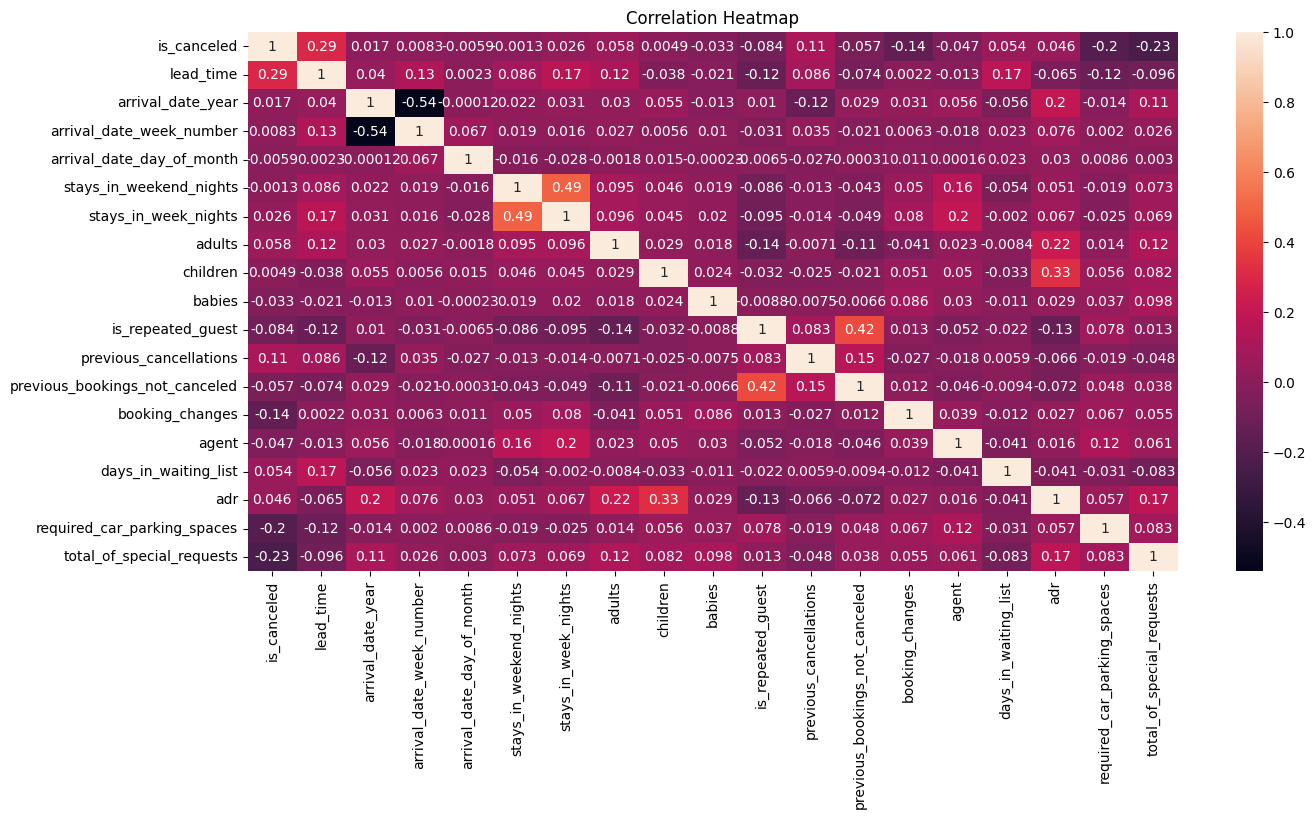

In [12]:
# Correalation between different numerical variables
data_num = data.select_dtypes(include=['int64', 'float64'])
Correlation_matrix = data_num.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(Correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()


- **Total Length of Stay**:
    - The analysis indicates a positive correlation between the `stays_in_weekend_nights` and `stays_in_week_nights` columns.
    - By merging these two features, we can create a new variable that represents the total length of stay, facilitating better insights into booking patterns and enhancing our ability to analyze guest behaviors.

- **Repeat Guest Behavior**:
    - There is a positive correlation observed between `previous_bookings_not_cancelled` and `is_repeated_guest`.
    - This correlation implies that guests who have successfully completed prior bookings are more likely to return as repeat guests, suggesting potential areas for focusing our guest retention strategies.

### Booking Trends Patterns

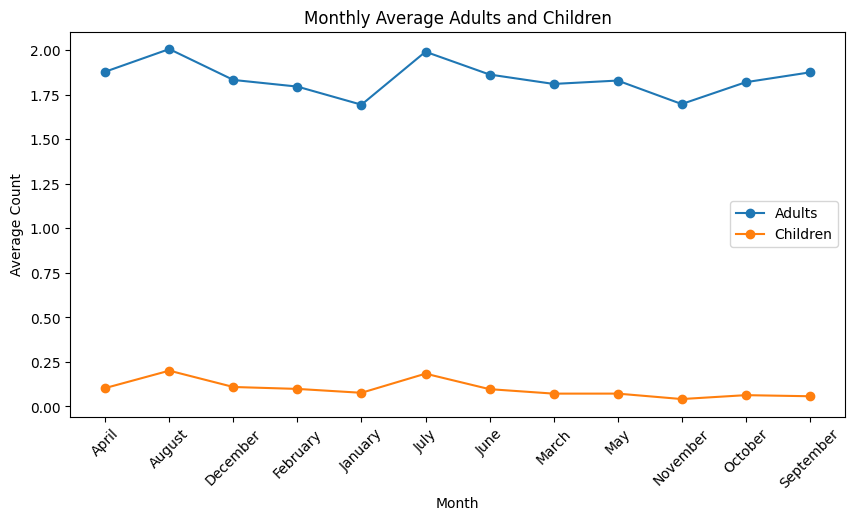

In [13]:
# Arrival Month pattern with Number of Adults and Chlidren
monthly_data = data.groupby('arrival_date_month')
plt.figure(figsize=(10, 5))
plt.plot(monthly_data['adults'].mean(), label='Adults',marker='o')
plt.plot(monthly_data['children'].mean(), label='Children',marker='o')
plt.title('Monthly Average Adults and Children')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

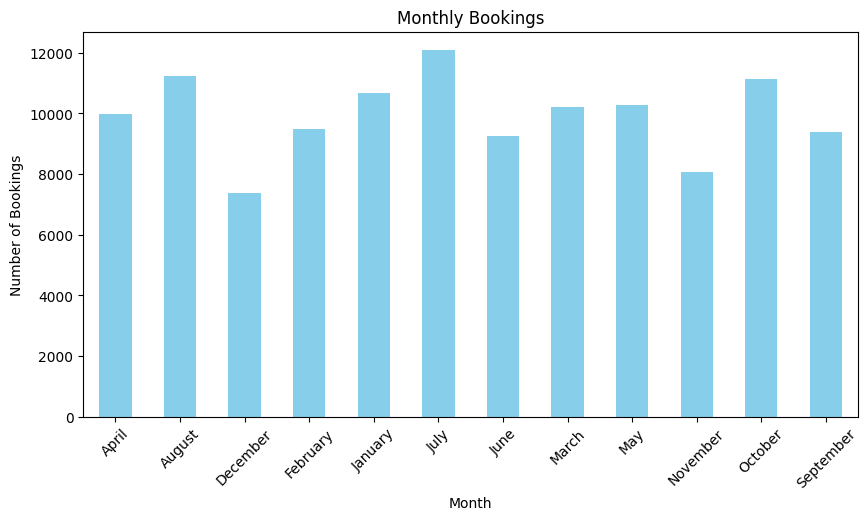

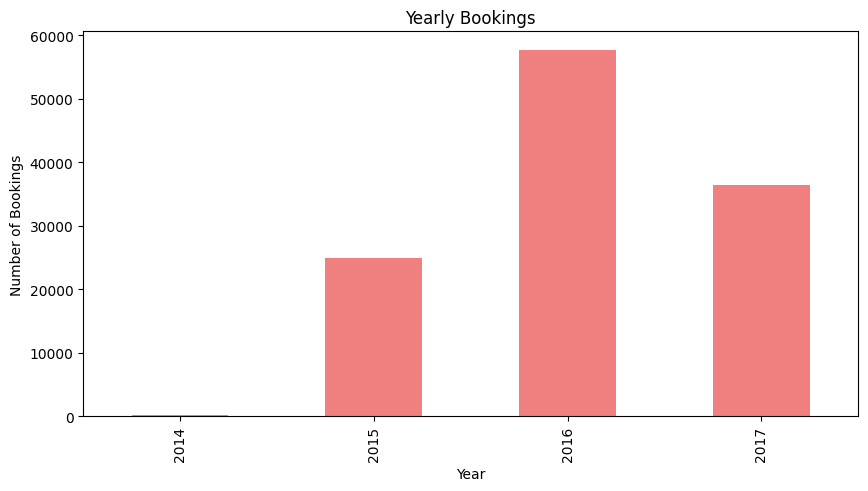

In [14]:
# Monthly trend on booking
data['month'] = data['reservation_status_date'].dt.month_name()
data['month'] = data['month'].str.capitalize()
monthly_bookings = data.groupby('month').size()
plt.figure(figsize=(10, 5))
monthly_bookings.plot(kind='bar', color='skyblue')
plt.title('Monthly Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()
# Yearly trend on booking
yearly_bookings = data.groupby(data['reservation_status_date'].dt.year).size()
plt.figure(figsize=(10, 5))
yearly_bookings.plot(kind='bar', color='lightcoral')
plt.title('Yearly Bookings')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.show()


In [15]:
# Booking trends based on  Countries

guests_by_country = data[data['is_canceled'] == 0]['country'].value_counts().reset_index()
guests_by_country.columns = ['Country', 'Number of guests']
guests_by_country


,Country,Number of guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [16]:
guests_map = px.choropleth(
    guests_by_country,
    locations = guests_by_country ['Country'],
    color = guests_by_country ['Number of guests'],
    hover_name = guests_by_country ['Country'],
    title='Guest Distribution by Country',
    color_continuous_scale=px.colors.sequential.deep
)

guests_map.show()

- It is observed from the guests to country that the most guests are coming from portugal followed by other europe countries.
- From the yearly trend of booking it is observed that the number of booking is more in the year 2016.
- From the monthly trend of booking it is observed that the number of booking is more in the month July.


### Checking Cancellation patttern

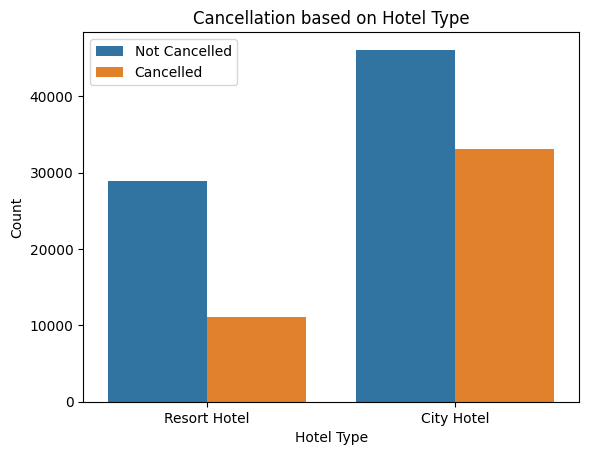

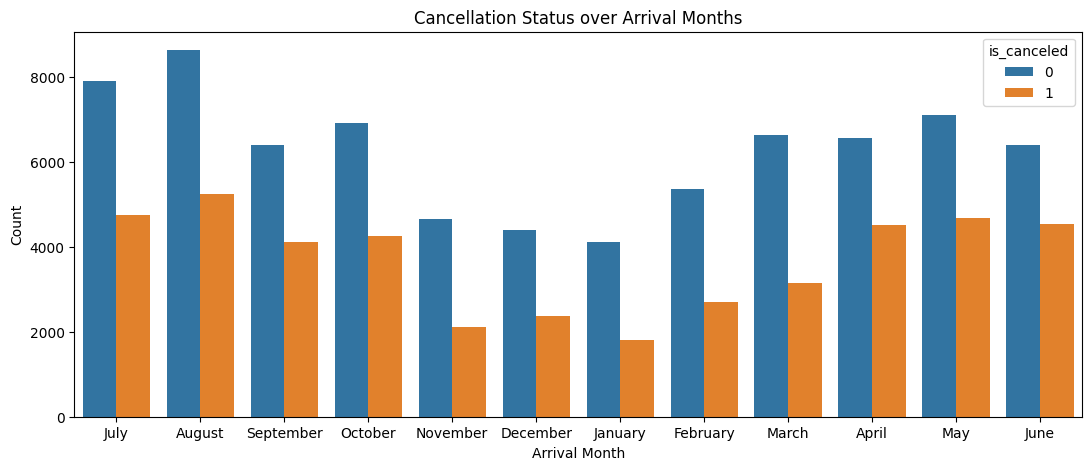

In [17]:
# Cancelling based on hotel type
plt.figure()
sns.countplot(x='hotel', hue='is_canceled', data=data)
plt.title('Cancellation based on Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

# Cancellation pattern over months
plt.figure(figsize=(13, 5))
sns.countplot(hue='is_canceled', x='arrival_date_month', data=data)
plt.title('Cancellation Status over Arrival Months')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.show()

- **Hotel Type Impact on Cancellation:**

  - The analysis reveals that cancellations are notably higher for the City Hotel compared to the Resort Hotel. This suggests that the booking patterns or guest preferences for city hotels may lead to higher cancellation rates.

- **Monthly Cancellation Patterns:**

  - The month of June exhibits a significant increase in cancellations, surpassing the number of non-cancellations for that month.
  - In contrast, March, July, and August show higher figures for non-cancellations than cancellations, indicating a more stable booking situation during these months.

### Customer Type Analysis

<ipython-input-18-2db7bbb7e544>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




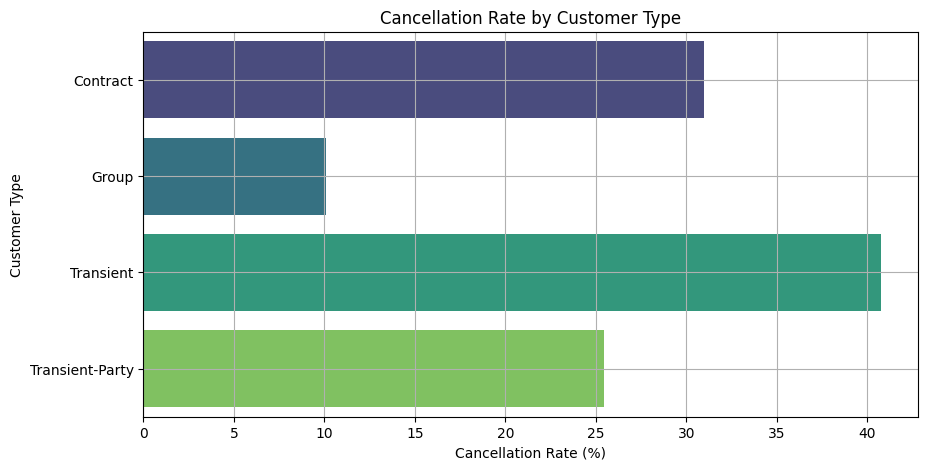

In [18]:
# Calculate cancellation rates per customer type
cancellation_rate_by_customer_type = data.groupby('customer_type')['is_canceled'].mean().reset_index()
cancellation_rate_by_customer_type.columns = ['customer_type', 'cancellation_rate']

# Add percentage for better interpretation
cancellation_rate_by_customer_type['cancellation_rate'] = cancellation_rate_by_customer_type['cancellation_rate'] * 100

# Plotting the cancellation rate by customer type
plt.figure(figsize=(10, 5))
sns.barplot(x='cancellation_rate', y='customer_type', data=cancellation_rate_by_customer_type, palette='viridis')
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Customer Type')
plt.grid()
plt.show()

Customer type analysis, it is infered that the Transient type customers cancellation rate is high.